# Logistic Regression: From Application to Theory

## Table of Contents

- [1 Introduction](#1-introduction)
- [2 Application](#2-application)
    - [2.1 Logistic Regression Application Introduction - sentiment analysis](#21-logistic-regression-application-introduction---sentiment-analysis)
    - [2.2 Data Collection](#22-data-collection)
    - [2.3 Preprocessing the Data](#23-preprocessing-the-data)
        - [2.3.1 Tokenization](#231-tokenization)
            - [2.3.1.1 nltk](#2311-nltk)
            - [2.3.1.2 punkt](#2312-punkt)
            - [2.3.1.3 `word_tokenize`](#2313-word_tokenize)
            - [2.3.1.4 Example Summary](#2314-example-summary)
        - [2.3.2 Removing Stop Words](#232-removing-stop-words)
        - [2.3.3 Vectorization](#233-vectorization)
            - [2.3.3.1 `CountVectorizer`](#2331-countvectorizer)
    - [2.4 Build the Logistic Regression Model](#24-building-the-logistic-regression-model)
    - [2.5 Analysis of the Logistic Regression Model](#25-analysis-of-the-logistic-regression-model)
        - [2.5.1 Predicting Sentiment for New Review](#251-predicting-sentiment-for-new-reviews)
        - [2.5.2 Understanding the Coefficients](#252-understanding-the-coefficients)
        - [2.5.3 Checking for Overfitting or Underfitting](#253-checking-for-overfitting-or-underfitting)
    - [2.6 Evaluating the Model](#26-evaluating-the-model)
        - [2.6.1 Confusion Matrix](#261-confusion-matrix)
            - [2.6.1.1 Why Use a Confusion Matrix](#2611-why-use-a-confusion-matrix)
            - [2.6.1.2 Interpretation of Different Values](#2612-interpretation-of-different-values)
        - [2.6.2 Accuracy](#262-accurary)
            - [2.6.2.1 Example](#2621-example)
            - [2.6.2.2 Advantages of Accuracy](#2622-advantages-of-accuracy)
            - [2.6.2.3 Limitations of Accuracy](#2623-limitations-of-accuracy)
        - [2.6.3 Precision, Recall, F1 Score](#263-precision-recall-f1-score)
        - [2.6.4 ROC Curve And AUC](#264-roc-curve-and-auc)
            - [2.6.4.1 ROC Curve (Receiver Operating Charactersitic Curve)](#2641-roc-curve-receiver-operating-characteristic-curve)
            - [2.6.4.2 AUC (Area Under the ROC Curve)](#2642-auc-area-under-the-roc-curve)
            - [2.6.4.3 Example Code to Plot ROC Curve And Calculate AUC](#2643-example-code-to-plot-roc-curve-and-calculate-auc)
    - [2.7 Improving the Model](#27-improving-the-model)
        - [2.7.1 Feature Engineering](#271-feature-engineering)
            - [2.7.1.1 Stemming And Lemmatization](#2711-stemming-and-lemmatization)
        - [2.7.2 Hyperparameter Tuning](#272-hyperparameter-tuning)
            - [2.7.2.1 Regularization](#2721-regularization)
            - [2.7.2.2 Solver And Iterations](#2722-solver-and-iterations)
        - [2.7.3 Class Balancing](#273-class-balancing)
            - [2.7.3.1 Resampling](#2731-resampling)
            - [2.7.3.2 Cost Sensitive Learning](#2732-cost-sensitive-learning)
    - [2.8 Application Conclusion](#28-application-conclusion)
- [3 Theory](#3-theory)
    - [3.1 Introduction to the Theory](#31-introduction-to-the-theory)
    - [3.2 Understanding the Sigmoid Function](#32-understanding-the-sigmoid-function)
    - [3.3 Coefficients And Odds Ratios](#33-coefficients-and-odds-ratios)
        - [3.3.1 What Are Coefficients](#331-what-are-coefficients)
        - [3.3.2 What Are Log Odds](#332-what-are-log-odds)
        - [3.3.3 Transition From Log Odss to Odds](#333-transition-from-log-odds-to-odds)
        - [3.3.4 Why Do We Care About The Odds Ratio](#334-why-do-we-care-about-the-odds-ratio)
        - [3.3.5 Example](#335-example)
    - [3.4 Finding Parameters](#34-finding-parameters)
        - [3.4.1 What is a Cost Function](#341-what-is-a-cost-function)
        - [3.4.2 The Math of Log Loss](#342-the-math-of-log-loss)
        - [3.4.3 Why Log Loss](#343-why-log-loss)
        - [3.4.4 Log Loss For Multiple Data Points](#344-log-loss-for-multiple-data-points)
    - [3.5 Cost Function](#35-cost-function)
        - [3.5.1 The Objective](#351-the-objective)
        - [3.5.2 Maximum Likelihood Estimation](#352-maximum-likelihood-estimation)
            - [3.5.2.1 Mathematical Details](#3521-mathematical-details)
            - [3.5.2.2 Simplifying With Log Likelihood](#3522-simplifying-with-log-likelihood)
        - [3.5.3 Connection To Log Loss](#353-connection-to-log-loss)
    - [3.6 Gradient Descent](#36-gradient-descent)
        - [3.6.1 Mathematical Foundations](#361-mathematical-foundations)
        - [3.6.2 Gradient Descent Equations](#362-gradient-descent-equations)
        - [3.6.3 Detailed Example](#363-detailed-example)
        - [3.6.4 Using Optimal $w$ And $b$ For Predictions](#364-using-optimal-and-for-predictions)
    - [3.7 Decision Boundary](#37-decision-boundary)
        - [3.7.1 The Mathematics of The Decision Boundary](#371-the-mathematics-of-the-decision-boundary)
        - [3.7.2 Decision Rule](#372-decision-rules)
        - [3.7.3 Example With Code](#373-example-with-code)
    - [3.8 Evaluating Fit](#38-evaluating-fit)
        - [3.8.1 Statistical Measures For Model Evaluation](#381-statistical-measures-for-model-evaluation)
            - [3.8.1.1 Likelihood Ratio Test](#3811-likelihood-ratio-test)
            - [3.8.1.2 Akaike Information Criterion (AIC)](#3812-akaike-information-criterion-aic)
            - [3.8.1.3 Bayesian Information Criterion (BIC)](#3813-bayesian-information-criterion-bic)
        - [3.8.2 Relevance To Logistic Regression And Gradient Descent](#382-relevance-to-logistic-regression-and-gradient-descent)
        - [3.8.3 When Do You Do This](#383-when-do-you-do-this)
        - [3.8.4 Example](#384-example)
- [4 Advanced Concepts](#4-advanced-concepts)
    - [4.1 Regularization Techniques](#42-regularization-techniques)
        - [4.1.1 Ridge Regularization (L2 Regularization)](#411-ridge-regularization-l2-regularization)
        - [4.1.2 Lasso Regularization (L1 Regularization)](#412-lasso-regularization-l1-regularization)
        - [4.1.3 Summary](#413-summary)
    - [4.2 Multiclass Classification](#42-multiclass-classification)
        - [4.2.1 One-vs-All (OvA) and One-vs-One (OvO)](#421-one-vs-all-ova-and-one-vs-one-ovo)
        - [4.2.2 Softmax Regression](#422-softmax-regression)
            - [4.2.2.1 Cost Function & Gradient Descent](#4221-cost-function--gradient-descent)
            - [4.2.2.2 Evaluating Fit](#4222-evaluating-fit)
            - [4.2.2.3 Softmax Example - Classifying Fruits](#4223-softmax-example-classifying-fruits)
        - [4.2.3 Multiclass Classification - The Application](#423-multi-class-classification-the-application)
            - [4.2.3.1 Data Preprocessing](#4231-data-preprocessing)
            - [4.2.3.2 Model Training](#4232-model-training)
            - [4.2.3.3 Model Evaluation](#4233-model-evaluation)
            - [4.2.3.4 Use Cases](#4234-use-cases)
- [5 Conclusion](#5-conclusion)
    - [5.1 Next Steps](#51-next-steps)

## 1 Introduction

Imagine you're faced with a decision-making problem where you need to classify something into one of two categories. It might be determining if a bank loan should be approved or denied, or predicting if a student will pass or fail a test based on their study hours. You collect the necessary data, and your task is to find a way to make sense of it to arrive at a clear decision.

Logistic regression is the tool that can help you with this. Unlike linear regression, which is used to predict continuous values (values that can fall within a range, such as temperatures or prices), logistic regression is designed for binary decisions: yes or no, true or false, 1 or 0.

At its core, logistic regression works by taking your input data and transforming it into a probability, a chance that the answer is 'yes' or 'no'. It doesn't just draw a straight line through the data points but shapes a curve called the [sigmoid function](#32-understanding-the-sigmoid-function) that best represents the relationship between the variables.

Once you have found this mathematical expression, you can use it to make predictions with confidence. You'll know not just whether the answer is 'yes' or 'no', but also how confident you can be in that classification.

Logistic regression is a powerful yet accessible tool in statistics and machine learning. It's not just about crunching numbers; it's about understanding probabilities and making decisions that are informed, precise, and reflective of the complexity of real-world situations.

## 2 Application

### 2.1 Logistic Regression Application Introduction - Sentiment Analysis

Sentiment Analysis is a powerful technique that analyzes the emotions and opinions within text. In the context of movies, it can be applied to understand how audiences feel about a particular film based on their reviews. By applying Logistic Regression to this problem, we can categorize reviews as positive or negative, providing key insights for filmmakers, critics, and audiences.

### 2.2 Data Collection

For our application, we can obtain data from datasets specifically created for sentiment analysis. The dataset we'll be working with is the Large Movie Review Dataset, also known as the IMDb dataset. This is a comprehensive collection of 50,000 movie reviews, evenly split between positive and negative sentiments. It's publicly available and can be downloaded from the [Stanford AI Lab](http://ai.stanford.edu/~amaas/data/sentiment/). This has already been downloaded for this application and is available in the [aclImdb](./aclImdb/README) directory.

Now let's load this data into our application:

In [1]:
import os
TRAIN_PATH = './aclImdb/train'
TEST_PATH = './aclImdb/test'
# Load the movie review data
def load_movie_review_data(path):
    reviews = []
    labels = []
    for sentiment in ['neg', 'pos']:
        folder = os.path.join(path, sentiment)
        for filename in os.listdir(folder):
            with open(os.path.join(folder, filename), 'r') as file:
                reviews.append(file.read())
                labels.append(sentiment == 'pos')
    return reviews, labels

reviews, labels = load_movie_review_data(TRAIN_PATH)

In the code above we created a function that navigates into the folder with the movie reviews we downloaded and extract the contents of the positive and negative reviews.

### 2.3 Preprocessing the Data

Now that we've loaded the data, we need to preprocess it before training our model.

#### 2.3.1 Tokenization

Tokenization is the process of breaking down text into individual units, commonly known as tokens. In most cases, these tokens are words. Tokenization helps in analyzing the frequency and importance of individual words in the text.

For example:

In [2]:
from nltk import download as nltk_download
from nltk.tokenize import word_tokenize
# Download the necessary NLTK data for tokenization
nltk_download('punkt')
text = "I love movies."
tokens = word_tokenize(text)
print(tokens)

['I', 'love', 'movies', '.']


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/santiagogomez/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Let's break down this example to understand what just happened.  

##### 2.3.1.1 NLTK

NLTK is a package for building python programs to work with human language data. `nltk.download` is a function that makes it easy to download various resources, models, etc., for different NLTK functionalities. These resources are stored online, and the download function fetches them to be used locally.

##### 2.3.1.2 punkt

`punkt` is a tokenizer model used for unsupervised machine learning tokenization. It's a pre-trained model that knows how to tokenize sentences in different European languages. We downloaded this model when we called:
```python
nltk_download('punkt')
```

##### 2.3.1.3 word_tokenize
`word_tokenize` is a function that breaks input text into words, which is a common task in Natural Language Processing (NLP). It uses the Punkt tokenizer to perform this task. It uses the pre-trained Punkt tokenizer model to accurately split text into sentences or words. Without it, the `word_tokenize` function doesn't have the necessary knowledge to perform the tokenization.

##### 2.3.1.4 Example Summary
In our code example above, we downloaded the necessary pre-trained tokenizer model called Punkt which is used by NLTK, the package often used when working with human language data. We then called the `word_tokenize` function with the text `'I love movies.'` so we can break down that text into tokens. Lastly we printed out the resulting tokens `['I', 'love', 'movies', '.']`.

#### 2.3.2 Removing Stop Words
After tokenization, the next step is to remove stop words. Stop words are common words such as 'the', 'is', 'in', which are generally ignored in text data analysis. They don't contribute to the sentiment or meaning of the text, so they are removed to reduce the dimensionality of the data and focus more on informative words.

For example:

In [3]:
from nltk.corpus import stopwords
nltk_download('stopwords')

# create a set of English stop words
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
print(stop_words)
print(filtered_tokens)

{'is', 'has', 'most', "shan't", 'herself', 'off', 'other', 'were', 'just', 'here', 'will', 'did', 'wouldn', 're', 'on', 'do', 'myself', 'after', "shouldn't", 'that', 'didn', 'in', "hasn't", 'your', "she's", 'it', 'with', 'when', 'then', 'very', 'a', "you're", "couldn't", 'ourselves', 'this', 'own', 'what', 'll', 'was', 'down', 'does', "you'll", 'having', 'couldn', "isn't", "it's", 'its', 'through', 'isn', 'hasn', 'you', 'all', 'before', "doesn't", 'no', 'which', 'my', 'about', 'me', "you'd", 'himself', 'doing', "needn't", 'against', 'be', 'can', 'have', 'to', 'such', 'up', 'only', 'itself', 'while', 'yourselves', 'between', 'how', 'from', 'wasn', 'won', 'been', 'we', 'over', 'now', 'again', 'or', "should've", 'more', "won't", 'hadn', 'should', 'ours', 't', 'doesn', 'whom', 'themselves', 'during', 'why', 'so', 'any', 'mustn', 'because', 'shan', 'same', "mustn't", 'had', 'shouldn', "wasn't", 'm', 'her', 've', 'ma', 'under', 'o', 'are', 'and', 'out', 'am', 'at', 'them', 'yours', 'd', 'int

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/santiagogomez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In this example, we've downloaded a list of precompiled stop words for various languages from the NLTK servers when we ran the line:
```python
nltk_download('stopwords')
``` 

With this precompiled list of words downloaded, we filered out all of the tokens that were in this list of stop words so that we would only be left with informative words. In this case we filtered out the stop word `'I'` from the list of tokens `['I', 'love', 'movies', '.']`. The result after filtering out the stop words is: `['love', 'movies', '.']`.

#### 2.3.3 Vectorization

In machine learning, text data can't be fed directly to models since the models require numerical values. Vectorization is the translation process turning words and sentences into numerical forms, making them digestible for the models. Think of it as converting text into numbers, where each word or phrase becomes a unique numerical value. This transformation not only captures individual words but also the underlying meanings and relationships within the text.

##### 2.3.3.1 CountVectorizer
One common method for vectorizing text data is to use a technique that counts the occurrence of words. We can use `CountVectorizer` from the sklearn library for this purpose. `CountVectorizer` is a feature extraction technique used in Natural Language Processing (NLP) and text mining specifically designed to convert text data into a numerical format by counting word occurrences.

For example, let's imagine we have three simple movie reviews:

1. "I love this movie."
2. "I hate this movie."
3. "This movie is great. I love it."

Using `CountVectorizer`, we can represent these reviews in the following matrix:

|            | "I" | "love" | "this" | "movie" | "hate" | "is" | "great" | "it" |
|------------|:---:|:------:|:------:|:-------:|:------:|:----:|:-------:|:----:|
| Review 1:  |  1  |   1    |   1    |    1    |   0    |  0   |    0    |  0   |
| Review 2:  |  1  |   0    |   1    |    1    |   1    |  0   |    0    |  0   |
| Review 3:  |  1  |   1    |   1    |    1    |   0    |  1   |    1    |  1   |

This matrix is now a numerical representation of the text, and it can be used as input for various machine learning models, allowing them to analyze patterns and relationships within the text data.  If we choose to remove the stop words "I", "this", "is", "it", we'll get a simpler matrix of reduced dimensionality (less columns):

|            | "love" | "movie" | "hate" | "great" |
|------------|:------:|:-------:|:------:|:-------:|
| Review 1:  |   1    |    1    |   0    |    0    |
| Review 2:  |   0    |    1    |   1    |    0    |
| Review 3:  |   1    |    1    |   0    |    1    |

Here's how `CountVectorizer` works:

1. **Tokenization**: `CountVectorizer` starts by tokenizing the text, breaking it down into individual words, phrases, symbols, or other meaningful elements known as tokens.
   
2. **Building a Vocabulary**: `CountVectorizer` then builds a vocabulary by identifying unique tokens across all the documents. Each unique token becomes a feature in the resulting matrix.

3. **Counting Occurrences**: For each document, `CountVectorizer` counts the occurrences of each token in the vocabulary. These counts form the values of the matrix.

4. **Removing Stop Words (Optional)**: If specified, common words (stop words) that may not contribute to the analysis can be removed. This is done through the `stop_words` parameter.

5. **Creating the Matrix**: The final result is a sparse matrix, a matrix mostly filled with zeros, where each row corresponds to a document, and each column corresponds to a unique token from the vocabulary. The value in each cell represents the count of the occurrence of the token in the corresponding document (review). The result is a matrix filled mostly with zeros (sparse) because most documents only contain a small fraction of the entire vocabulary, so many counts will be zero.

By utilizing `CountVectorizer` we can combine the previous 2 steps, tokenization and removing stop words, and obtain a numerical representation of our text data that can be directly used in our model.  Let's continue building our sentiment analysis of movie reviews using logistic regression by leveraging `CountVectorizer`:

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(reviews)

In the code above we've created an instance of the `CountVectorizer` class and specified that the english stop words should be filtered out. We then used this instance, called `vectorizer`, and called the `fit_transform` method which does two things to the `reviews`:
 - `fit`: It learns the vocabulary of all the tokens in the `reviews`.
 - `transform`: It transforms the `reviews` into a matrix that contains the counts of each token's occurrence in the `reviews`.

The result is a matrix of word counts we called `X`. The `X` matrix are our numeric features. We'll now take this to split the data into testing and training sets so we can train and later validate our model:

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2)

We took our feature data `X`, which is a matrix of how often each word appears in each of the movie reviews we downloaded, and our target data `labels`, which contains the result of each review, whether it's a positive review or a negative review, and split each into testing and training sets of data.

### 2.4 Building the Logistic Regression Model

Now that our data has been preprocessed and we've obtained our training and testing sets, it's time to build our Logistic Regression model:

In [6]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

By calling `model.fit`, we're training our model on the provided training data. It will iteratively learn the relationship between the words in the reviews (`X_train`) and their corresponding sentiments (`y_train`). `max_iter=10000` simply means we're giving the model enough time to learn from our data. 

We can then use the trained model to make predictions on our testing set:

In [7]:
y_pred = model.predict(X_test)

Our model is now ready, and we can proceed to analyze and evaluate its performance.

### 2.5 Analysis of the Logistic Regression Model

#### 2.5.1 Predicting Sentiment for New Reviews

Having trained the model using movie reviews and their corresponding sentiments, we can now apply this model to predict the sentiment of new reviews.

Suppose you have a new review and you want to know whether it's positive or negative. Here's how you can predict the sentiment using our trained Logistic Regression model:

In [8]:
def predictSentiment(text, sentiment_model = model, vectorize = vectorizer):
    # Transforming the text so that it matches the training data
    text_vectorized = vectorize.transform([text])
    # Predicting the sentiment
    predicted_sentiment = sentiment_model.predict(text_vectorized)
    # Decoding the predicted sentiment
    sentiment = "Positive" if predicted_sentiment[0] == 1 else "Negative"
    print(f"Text: {text}\nPredicted sentiment: {sentiment}\n")

predictSentiment("This movie was fantastic!")
predictSentiment("This movie was awful!")
predictSentiment("I didn't think this movie was amazing as many reviews have stated. In fact, I thought it was mediocre at best!")

Text: This movie was fantastic!
Predicted sentiment: Positive

Text: This movie was awful!
Predicted sentiment: Negative

Text: I didn't think this movie was amazing as many reviews have stated. In fact, I thought it was mediocre at best!
Predicted sentiment: Positive



As we have shown with the code above, the trained model can be applied to any new reviews, transforming them into the same vectorized form using the `CountVectorizer` and then classifying them with the `LogisticRegression` model.

This process ensures that the new reviews are treated consistently with the training data, enabling reliable predictions.

However, some of the predictions may not always be quite what you expect. Let's analyze our logistic regression model to further understand how it's working with our movie reviews data.

#### 2.5.2 Understanding the Coefficients

In Logistic Regression, the relationship between the features (words in the reviews) and the target (sentiment) is quantified using coefficients. The coefficients of our model represent the weight or importance assigned to each word or feature in determining the sentiment of a review.

In [9]:
coefficients = model.coef_[0]
print(coefficients)

[-3.86136966e-01 -7.33645030e-02 -4.98088810e-03 ...  7.60698871e-06
  7.34957878e-03 -1.90900495e-02]


By examining the coefficients, we can understand how each word in the reviews contributes to the predicted sentiment. Here's how to print the top coefficients:

1. We first need to get the actual words. To achieve this we use the `vectorizer.get_feature_names_out()` function. This function retrieves the feature names, which are the words in the vocabulary that were vectorized during the preprocessing phase.

In [10]:
feature_names = vectorizer.get_feature_names_out()

2. We then need to pair up the coefficients with their respective feature names. We use `zip` for this purpose as it's a function that generates tuples. In the code below, `zip` combines the coefficients with the corresponding feature names. Since both `coefficients` and `feature_names` are lists that correspond to each other (meaning the $n^\text{th}$ element in `coefficients` corresponds to the $n^\text{th}$ word in `feature_names`), using zip creates pairs that maintain this relationship. 
    
    For example, if you had:
     - `coefficients = [0.5, -0.3, 1.2]`
     - `feature_names = ['happy', 'sad', 'great']`
    
    Using `zip(coefficients, feature_names)` would return the pairs:
     - `(0.5, 'happy')`, `(-0.3, 'sad')`
     - `(1.2, 'great')`.

In [11]:
feature_name_coefficient_pairs = zip(coefficients, feature_names)

3. Now that we have the feature names with their respective coefficients, we can sort them based on the coefficient to see which values have the greatest influence

In [12]:
# function to sort the coefficients
def sort_key(coefficient_word_tuple):
    coefficient, _ = coefficient_word_tuple
    return coefficient

# sort the coefficients from the smallest to the largest
sorted_coefficients = sorted(feature_name_coefficient_pairs, key=sort_key, reverse=True)

Let's examine the model's top positive and negative coefficients. The positive coefficients reveal the words most associated with a positive sentiment, while the negative coefficients show the words most linked to a negative sentiment.

In [13]:
print("Top Positive Coefficients:")
for coef, word in sorted_coefficients[:10]:
    print(f"{word}: {coef}")

print("\nTop Negative Coefficients:")
for coef, word in sorted_coefficients[-10:]:
    print(f"{word}: {coef}")

Top Positive Coefficients:
refreshing: 1.468695861151434
excellent: 1.4386205646617525
superb: 1.396580092610923
funniest: 1.3759493453402059
perfectly: 1.2911484191681557
wonderful: 1.2299144186945092
wonderfully: 1.2115492887463821
scariest: 1.1728564011953295
surprisingly: 1.1703698646948169
incredible: 1.1677659675136647

Top Negative Coefficients:
boring: -1.3495088723156414
unfunny: -1.3496654099395518
britney: -1.396048326271215
lacks: -1.4580028964555967
disappointing: -1.6231886511862827
poorly: -1.783536356624296
awful: -1.829039864486529
disappointment: -1.9676568030588515
worst: -2.133035850009885
waste: -2.2000592130279117


The model has learned the words with the positive coefficients are the ones that usually appear in positive reviews, which means they contribute to a prediction of positive sentiment. Similarly, the model has learned that the words with negative coefficients are the ones that usually appear in a negative review. Since these are the top coefficients, it means that these words have a strong association with their respective sentiment. These are the words that the model considers most influential in determining the sentiment of a review.

#### 2.5.3 Checking for Overfitting or Underfitting

We want our model to perform well not just on the training data but also on unseen data. This requires avoiding overfitting (too complex) and underfitting (too simple).

As discussed in [Linear Regression - Deeper Dive sections 2.3 and 2.4](../linear-regression/Linear%20Regression%20-%20Deeper%20Dive.ipynb), Overfitting is when a model performs exceptionally well on training data but poorly on unseen data and underfitting is when the model performs poorly on both.

We can check for overfitting and underfitting by comparing the accuracy on the training and testing datasets. Below, we compare how well the model model is predicting the sentiments of the reviews it was trained on, `train_accuracy`, and how well the model is predicting the sentiments of reviews it hasn't seen. The accuracy on the test data, `test_accuracy`, provides a measure of how well the model generalizes to new, unseen data.

In [14]:
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

Training Accuracy: 0.99875
Testing Accuracy: 0.8758


A significant difference between the training and testing accuracies might indicate overfitting. Similarly, poor performance on both may signal underfitting. Cross-validation, as mentioned in [Linear Regression - Deeper Dive section 2.6.1](../linear-regression/Linear%20Regression%20-%20Deeper%20Dive.ipynb), can further assist in detecting these issues.

### 2.6 Evaluating the Model

Model evaluation is a crucial phase in the machine learning process, as it allows us to understand how well the model performs on unseen data and identifies areas for improvement. In this section, various metrics are used to evaluate the Logistic Regression model trained on movie reviews.

#### 2.6.1 Confusion Matrix

The confusion matrix is an essential tool in classification problems, like the sentiment analysis model we're working with. It's used to understand the performance of the algorithm, particularly in binary classification (two-class problems). It's a table that displays the number of correct and incorrect predictions made by the classification model. It consists of four components:

- **True Positives (TP)**: The model correctly predicted the positive class. In the context of movie reviews, this means the model correctly identified a review as positive.
- **True Negatives (TN)**: The model correctly predicted the negative class. This means the model correctly identified a review as negative.
- **False Positives (FP)**: The model incorrectly predicted the positive class (Type I error). This means the model identified a review as positive when it was actually negative.
- **False Negatives (FN)**: The model incorrectly predicted the negative class (Type II error). This means the model identified a review as negative when it was actually positive.

Here's a visual representation:

|                 | Predicted Positive | Predicted Negative |
|-----------------|--------------------|--------------------|
| Actual Positive | TP                 | FN                 |
| Actual Negative | FP                 | TN                 |


#### 2.6.1.1 Why Use a Confusion Matrix?

1. **Comprehensive Insight**: It provides a comprehensive summary of the model's performance across all categories, not just overall accuracy. This helps in identifying specific errors.

2. **Error Analysis**: You can see exactly where the model is failing, such as whether it's classifying too many negative reviews as positive or vice versa.

3. **Improving the Model**: By understanding where the model is making mistakes, you can take appropriate actions to tweak and improve it.

#### 2.6.1.2 Interpretation of Different Values

- **High TP and TN**: Indicates good performance in correctly identifying both positive and negative reviews.
- **High FP**: Suggests that the model often mistakenly classifies a negative review as positive, which may imply that it's biased toward predicting positives.
- **High FN**: Suggests that the model often mistakenly classifies a positive review as negative, indicating a bias toward predicting negatives.

In [15]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)
print('True Negative (TN):', cm[0][0])  # Actual Negative, Predicted Negative
print('False Positive (FP):', cm[0][1]) # Actual Negative, Predicted Positive
print('False Negative (FN):', cm[1][0]) # Actual Positive, Predicted Negative
print('True Positive (TP):', cm[1][1])  # Actual Positive, Predicted Positive

Confusion Matrix:
 [[2148  337]
 [ 284 2231]]
True Negative (TN): 2148
False Positive (FP): 337
False Negative (FN): 284
True Positive (TP): 2231


#### 2.6.2 Accurary

Accuracy is a straightforward metric used to evaluate classification models. It calculates the proportion of instances that have been correctly classified out of the total instances in the dataset. In simple terms, accuracy tells us the percentage of times the model made the correct prediction, serving as a clear indication of how well the classification model is performing.

Once we have a [confusion matrix](#261-confusion-matrix), we can calculate Accuracy as follows:

$$
\text{Accuracy} = \frac{{\text{TP + TN}}}{{\text{TP + TN + FP + FN}}}
$$

Where:
- TP: True Positives
- TN: True Negatives
- FP: False Positives
- FN: False Negatives

In the context of our sentiment analysis model, accuracy tells us the percentage of movie reviews that were correctly classified as either positive or negative.

#### 2.6.2.1 Example

Suppose we have the following confusion matrix:

|                 | Predicted Positive | Predicted Negative |
|-----------------|--------------------|--------------------|
| Actual Positive | 2219 (TP)          | 273   (FN)         |
| Actual Negative | 330  (FP)          | 2178  (TN)         |

The accuracy would be calculated as:

$$
\text{Accuracy} = \frac{{2219 + 2178}}{{2219 + 2178 + 330 + 273}} = \frac{{4397}}{{5000}} = 0.8794
$$

This means that the model correctly classified 87.94% of the movie reviews.

#### 2.6.2.2 Advantages of Accuracy

- **Easy to Understand:** Accuracy is intuitive and easy to interpret. It simply tells you the proportion of instances that were classified correctly.

- **Widely Used:** It is a common metric used in classification problems and is often the first metric people turn to when evaluating a model.

#### 2.6.2.3 Limitations of Accuracy

- **Not Suitable for Imbalanced Classes:** If one class is significantly more prevalent than the other, a model might achieve high accuracy by merely predicting the majority class. This can make the model look deceptively good, even though it may not be performing well on the minority class.
    - **Example**: Imagine we had 100 movie reviews. 90 of these reviews are positive and 10 are negative. A model that only ever predicts positive will have a 90% accuracy, even though it can't ever identify any negative reviews since it only ever predicts positive.

<br>

- **Doesn't Consider the Cost of Errors:** Accuracy treats all errors the same, regardless of whether they are false positives or false negatives. In some contexts, these errors may have different implications, and accuracy doesn't capture that nuance.
    - **Example**: In movie review sentiment analysis, misclassifying a negative review as positive (FP) might not be as serious as missing a good review (FN). Missing a good review could upset filmmakers more than falsely praising a bad movie.

In [16]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8758


#### 2.6.3 Precision, Recall, F1 Score

- **Precision**: Precision is a measure of how many correct positive predictions were made out of all positive predictions. A high precision means that false positive errors are low.
  - **True Positives (TP)**: Correct positive predictions.
  - **False Positives (FP)**: Incorrect positive predictions.
  $$
  \text{Precision} = \frac{{TP}}{{TP + FP}}
  $$

- **Recall**: Recall assesses how many correct positive predictions were made out of all actual positive observations. A high recall means that false negative errors are low.
  - **True Positives (TP)**: Correct positive predictions
  - **False Negatives (FN)**: Incorrect negative predictions (missed positive observations).

  $$
  \text{Recall} = \frac{{TP}}{{TP + FN}}
  $$

- **F1 Score**: The F1 Score is the harmonic mean of precision and recall.  It provides a single score that balances the trade-off between precision and recall.

  $$
  \text{F1 Score} = 2 \cdot \frac{{\text{Precision} \cdot \text{Recall}}}{{\text{Precision} + \text{Recall}}}
  $$


In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Precision: 0.8687694704049844
Recall: 0.8870775347912525
F1 Score: 0.8778280542986425


#### 2.6.4 ROC Curve and AUC

##### 2.6.4.1 **ROC Curve (Receiver Operating Characteristic Curve)**

The ROC Curve is a graphical representation of the model's ability to discriminate between positive and negative classes. It plots how two parameters, the True Positive Rate, and the False Positive Rate, changes as the threshold levels change. Threshold, in our case, is the cut-off point used by the model to decide whether a review is positive or negative. If the model's calculated probability for a review being positive is above this threshold, it's classified as positive; otherwise, it's classified as negative.

- **True Positive Rate (TPR), Also Called Recall**: The proportion of actual positives that are correctly classified. It is also known as Sensitivity or [Recall](#263-precision-recall-f1-score).

   $$
   \text{TPR} = \frac{{\text{TP}}}{{\text{TP} + \text{FN}}}
   $$

- **False Positive Rate (FPR)**: The proportion of actual negatives that are incorrectly classified as positive.

   $$
   \text{FPR} = \frac{{\text{FP}}}{{\text{FP} + \text{TN}}}
   $$

As the model's threshold changes, both TPR and FPR will change, and plotting these values gives us the ROC curve. The curve helps us understand the trade-offs between sensitivity (recall) and specificity (true negative rate).

##### 2.6.4.2 **AUC (Area Under the ROC Curve)**

- **AUC**: The Area Under the Curve (AUC) is a single number that represents the model's ability to correctly classify positive and negative observations. It represents the likelihood that a randomly chosen positive instance is ranked higher than a randomly chosen negative instance. The AUC ranges from 0 to 1:

- **1**: Perfect Model (or Classifier).
- **0.5**: Random Model (no discrimination between classes).
- **0**: Completely wrong Model.

#### 2.6.4.3 Example Code to Plot ROC Curve and Calculate AUC

In this example, we will walk through how to plot the ROC curve and calculate the AUC score for our binary classification problem, sentiment analysis of movie reviews.

**Import Required Libraries**

First, we import the necessary functions from sklearn for plotting and calculating the ROC curve and the AUC score. We'll also need matplotlib to visualize the curve.

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

**Get Probabilities for Each Sample**

Next we'll need to get the probabilities of each data sample since the `roc_curve` function requires the probabilities for each class to compute the ROC curve. This is because the ROC curve is fundamentally designed to examine how the True Positive Rate and False Positive Rate change as we vary the threshold for classification. The threshold is essentially applied to the probability scores that the model generates. So, to plot the ROC curve, we need these probabilities.

In [19]:
y_prob = model.predict_proba(X_test)
print(y_prob)

[[2.65724617e-02 9.73427538e-01]
 [1.57972000e-01 8.42028000e-01]
 [6.28934348e-01 3.71065652e-01]
 ...
 [9.99999812e-01 1.87967237e-07]
 [8.34185432e-01 1.65814568e-01]
 [9.72588770e-01 2.74112304e-02]]


In the array `y_prob`, each row corresponds to a single data sample (in our case, a movie review), and each column in that row corresponds to the probability of the sample belonging to a particular class. The first column is the probability of the negative class, and the second is for the positive class.. For example, if we had two movie reviews: 

|Review                     |
|:-------------------------:|
|"The Movie is Great"       |
|"The Movie is Not So Good" |

If we obtain the probabilities of each of these reviews we might get an array that looks like: 

```python
[
    [0.06, 0.94],
    [0.76, 0.24]
]
```

Which is better represented in a table as:
| Negative | Positive |
|:--------:|:--------:|
|   0.06   |   0.94   |
|   0.76   |   0.24   |

Each row represents a data sample, so putting both tables together gives us:

|Review                     | Negative | Positive |
|:-------------------------:|:--------:|:--------:|
|"The Movie is Great"       |   0.06   |   0.94   |
|"The Movie is Not So Good" |   0.76   |   0.24   |


**Extract Probabilities of the Positive Class**

We focus solely on the positive class probabilities for plotting the ROC curve. This streamlined approach simplifies interpretation without sacrificing insight into the model's performance on both classes. Essentially, knowing the probability of a review being positive automatically informs us about its likelihood of being negative. For instance, a 94% probability of a review being positive implies a 6% chance of it being negative. So, we only get the column indexed by `1`, which corresponds to the probabilities of the positive class.

In [20]:
# keep every row, but only keep the probabilities for the positive class
y_prob = y_prob[:, 1]
print(y_prob)

[9.73427538e-01 8.42028000e-01 3.71065652e-01 ... 1.87967237e-07
 1.65814568e-01 2.74112304e-02]


**Calculate ROC Curve and AUC**

Here, `roc_curve` computes the false positive rate (`fpr`), true positive rate (`tpr`), and thresholds at various levels. The AUC score is calculated using `roc_auc_score`, and it gives us a single metric to evaluate our model.

In [21]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)


**Plotting the Curve**

This code plots the ROC curve, with the False Positive Rate on the x-axis and the True Positive Rate on the y-axis. The label also includes the calculated AUC score, giving a quick visual indicator of the model's performance.

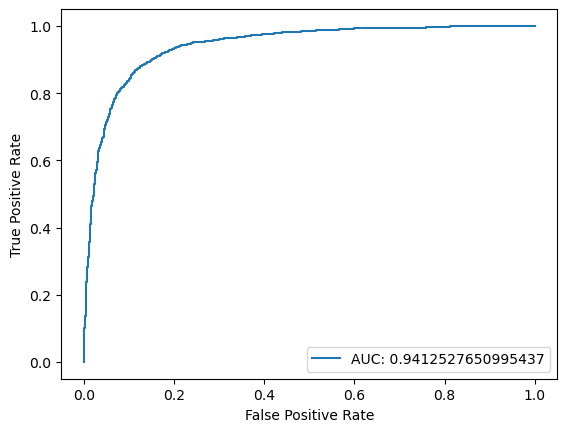

In [22]:
plt.plot(fpr, tpr, label=f'AUC: {auc}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

**Understanding the Plot**

The ROC curve we've just plotted illustrates how the True Positive Rate (TPR) and the False Positive Rate (FPR) change as the classification threshold changes. The X-axis shows the FPR, and the Y-axis shows the TPR. Now, let's delve into what this means:

- **Top-Left Corner**: If the curve hugs the top-left corner, we're in luck. Our model has a high TPR and a low FPR, which is ideal. This region indicates strong performance. Lucky for us, this is our case.
  
- **Diagonal Line**: If the curve were to be close to the diagonal line running from the bottom-left corner to the top-right corner, then the model would be performing no better than just randomly guessing. If this were our case, our model's ability to discriminate between the positive and negative class would be rather weak.

- **Curve Smoothness**: A smoother curve generally indicates that the model's performance is consistent across different threshold values. In contrast, a "jagged" curve might suggest that the model is unstable at certain thresholds.

**Practical Implications**

- **Model Selection**: If we had multiple models to choose from, the various model's ROC curves can be plotted on the same graph to provide a visual comparison. The model with the curve that is more to the top-left is generally the better performer.

- **Threshold Selection**: The curve can be a guide in choosing an optimal threshold based on specific needs. If we wanted to prioritize reducing false positives, we would look for a point on the curve that is as high as possible on the Y-axis, but to the left on the X-axis.

**Comprehensiveness of Metrics**

Understanding the trade-offs between TPR and FPR at various thresholds is vital because different applications may require different trade-offs. For example:

- In medical diagnostics, having a high TPR (catching all true cases) could be more important than having a low FPR (avoiding false alarms).
  
- In a spam detection system, keeping FPR low (not flagging genuine emails as spam) might be more crucial than a high TPR (catching all spam).

**Model Tuning and Robustness**

The ROC curve doesn't just show how well a model is doing; it offers insights into how it can be made better. If our curve wasn't close to the top-left corner, we could:
- consider more feature engineering.
- Try different algorithms that might be better suited to our data distribution.
- Look into techniques to balance class distribution if our dataset was imbalanced.

By understanding the detailed behavior of your model through the ROC curve and AUC, you're better equipped to fine-tune it, make more informed decisions, and ultimately build a more robust, reliable model.

### 2.7 Improving the Model

Improving a machine learning model is an iterative process. Once you've established a baseline with your initial model and examined its performance through metrics and visualizations like the ROC curve, the next logical step is to seek improvements. Below are several strategies tailored for sentiment analysis in movie reviews:

#### 2.7.1 Feature Engineering

Feature engineering is pivotal in enhancing a model's performance. In the realm of text data, especially for sentiment analysis, there are a few primary techniques: Stemming and Lemmatization, [Stop-Word Removal](#232-removing-stop-words), and [Text Vectorization](#233-vectorization). We've already discussed stop words and text vectorization, so let's instead dive in to Stemming and Lemmatization.

##### 2.7.1.1 Stemming and Lemmatization

These techniques reduce words to their root forms, making it easier for the model to generalize across various forms of a word.

- **Stemming**: It's a bit crude but faster. Words are reduced to their root by removing suffixes.
- **Lemmatization**: More sophisticated, it considers the morphological analysis of the words and usually requires more computational power.


In [23]:
from nltk.stem import PorterStemmer, WordNetLemmatizer

nltk_download('wordnet')
# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Example words
words = ["running", "flies", "denied"]
print(f"Words: {words}")

# Stemming
stemmed_words = [stemmer.stem(word) for word in words]
print(f"Stemmed Words: {stemmed_words}")

# Lemmatization
lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
print(f"Lemmatized Words: {lemmatized_words}")

Words: ['running', 'flies', 'denied']
Stemmed Words: ['run', 'fli', 'deni']


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/santiagogomez/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Lemmatized Words: ['running', 'fly', 'denied']


#### 2.7.2 Hyperparameter Tuning

#### 2.7.2.1 Regularization

Logistic regression models can be regularized to prevent overfitting. Parameters like $C$ in Scikit-learn's `LogisticRegression` can be fine-tuned. $C$ is the inverse of the regularization strength, smaller values imply stronger regularization. We'll discuss more about regularization in [a later section](#41-regularization-techniques).

Here's an example of how to apply regularization:

In [24]:
from sklearn.linear_model import LogisticRegression

# Apply L2 regularization
clf = LogisticRegression(C=0.1, penalty='l2', max_iter=10000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

predictSentiment("I didn't think this movie was good, it was terrible!", clf)

Precision: 0.877630553390491
Recall: 0.895427435387674
F1 Score: 0.8864396772288919
Text: I didn't think this movie was good, it was terrible!
Predicted sentiment: Negative



#### 2.7.2.2 Solver and Iterations

In the context of logistic regression, a solver is essentially the optimization algorithm that you use to find the model parameters that minimize the cost function. You can think of it as the "engine" that powers the logistic regression model's learning process. Iterations are the number of passes the optimization algorithm will make through the training dataset to update the model parameters. Too few iterations can result in an underfit model, while too many may lead to overfitting.

Different solvers and the number of iterations can also impact model performance.

**Different Types of Solvers**

There are various types of solvers, each with its own set of advantages and disadvantages. Here's a brief overview:

- **`newton-cg`**: This solver utilizes the Newton-Raphson method for optimization. It's good for handling multiclass problems and is well-suited for large datasets. However, it can be computationally expensive.

- **`lbfgs`**: Short for Limited-memory Broyden–Fletcher–Goldfarb–Shanno. It's an optimization algorithm in the family of quasi-Newton methods. It approximates the second derivative matrix updates with low memory usage. It's the default solver for Scikit-learn’s Logistic Regression.

- **`sag`**: Stochastic Average Gradient descent. It is a variant of gradient descent and is faster for large datasets.

- **`saga`**: Stands for Stochastic Average Gradient Descent Aggregated. It is an extension of `sag` that also allows for L1 regularization. It generally performs well with large datasets and high dimensionality.

**Why Different Solvers?**

Choosing a solver depends on the size and nature of your data. Some solvers perform better on smaller datasets, while others are optimized for large-scale data. For example, if your data is sparse, or mostly empty or zero, and has many features, using `saga` might be more efficient.

In [25]:
# Example: Using the 'saga' solver with 100 iterations; clf is short for "classifier," which is another name for a machine learning model
clf = LogisticRegression(solver='saga', max_iter=100)
clf.fit(X_train, y_train)

/Users/santiagogomez/anaconda3/envs/ml-learning/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(solver='saga')

#### 2.7.3 Class Balancing

Imbalanced classes can be a significant obstacle when training a logistic regression model. The model may learn to predict the majority class better at the expense of the minority class, leading to a skewed performance. For instance, if our dataset had way more positive reviews than negative reviews, the model would learn to better detect positive reviews, the majority class, better than the negative reviews, the minority class. Below are some techniques to handle this issue:

#### 2.7.3.1 Resampling

If the classes are imbalanced, you might consider oversampling the minority class or undersampling the majority class.

- **Oversampling the Minority Class**: This involves creating additional copies of instances from the minority class or generating new instances based on them. The goal is to balance out the number of instances for each class in the dataset.

  - **SMOTE**: Synthetic Minority Over-sampling Technique is a popular algorithm that creates synthetic instances of the minority class.


```python
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
```

- **Undersampling the Majority Class**: This involves randomly removing instances from the majority class to balance the dataset. However, you risk losing potentially useful data.

  - **Random Undersampling**:

```python
from imblearn.under_sampling import RandomUnderSampler
    
rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(X_train, y_train
```

#### 2.7.3.2 Cost-sensitive Learning

You can also make the learning algorithm sensitive to the class imbalance by adjusting the class weights during model training.

- **Class Weights**: Scikit-learn’s `LogisticRegression` offers a `class_weight` parameter that allows you to specify a different cost for misclassifying samples. If the classes are imbalanced, you can adjust this parameter to make the algorithm sensitive to the imbalance.

  - For example, if the minority class is two times more important, you can set the class weight as follows:


```python
from sklearn.linear_model import LogisticRegression

# different class weights for labels 0 and 1. lable '0' is weighted 1, label '1' is weighted 2
clf = LogisticRegression(class_weight={0: 1, 1: 2})
clf.fit(X_resampled, y_resampled)
```

- **Custom Loss Function**: Some algorithms allow you to specify a custom loss function that can take class imbalance into account. However, this usually requires a deeper understanding of the model and optimization process.

### 2.8 Application Conclusion

In this application section, we've demystified the process of using logistic regression for real-world challenges like sentiment analysis. We started by grappling with raw data, learning how to preprocess and vectorize it for machine readiness. Then, we constructed our logistic regression model, explored its components, and assessed its performance with critical evaluation metrics. Now that you've seen the art of applying logistic regression, you may be asking, "How does this mathematical magic really work?" As we transition into the next section, we'll delve into the nuts and bolts of logistic regression theory, giving you a well-rounded understanding that extends beyond the application.

## 3 Theory

#### 3.1 Introduction to the Theory

In [linear regression](../linear-regression/Linear%20Regression.ipynb), our goal is to predict a continuous dependent variable $ y $, such as a stock price, based on one or more independent variables $ \mathbf{X} $. We employ the equation $ y = \mathbf{mX} + b $, where $ \mathbf{m} $ is a vector of coefficients, and $ b $ is the bias term. However, what if we are more interested in binary outcomes like whether a stock will rise or fall, or whether a movie review is positive or negative? This is where logistic regression enters the scene.

Logistic regression doesn't predict an exact value for $ y $. Instead, it predicts the likelihood of $ y $ being a particular category. Questions such as "Will the medical test be positive or negative?" or "Is the stock going up or down?" can be answered using this method. How do we make this work? We plug the linear equation into a special function, called the [sigmoid function](#32-understanding-the-sigmoid-function), that maps its output to a range between 0 and 1. This mapped output can then be interpreted as a probability. In this context, a value of 1 would represent a 100% chance of a particular outcome, while 0 would represent no chance. Categories like 'Fail/Pass,' 'No/Yes,' and 'Negative/Positive' can be easily represented with this approach.

When we looked at the theory of [linear regression](../linear-regression/Linear%20Regression.ipynb), we saw that in simpler models with a single feature, $ m $ and $ b $ are just numbers. But as our models grow in complexity—say, by including multiple features—the variables involved evolve. Here, $ \mathbf{X} $ and $ \mathbf{m} $ become vectors, with each element corresponding to a unique feature in $ \mathbf{X} $. Even $ b $ can transform into a matrix, particularly in the context of multinomial logistic regression where the output can be one of multiple categories. 

### 3.2 Understanding the Sigmoid Function
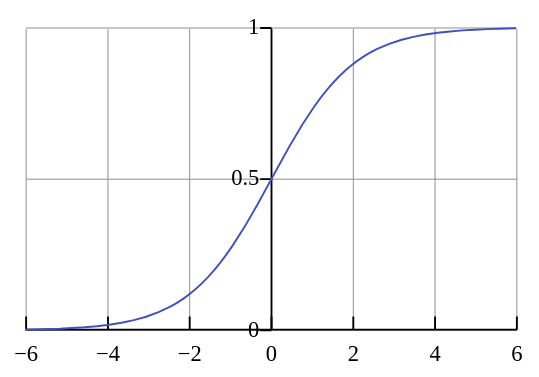

The sigmoid function plays a crucial role in logistic regression. In logistic regression, we don't use $ y = \mathbf{mX} + b $ directly to predict our dependent variable $ y $. Instead, we plug $ \mathbf{mX} + b $ into this special function called the sigmoid function, or logistic function, which maps any real-valued number into a value between 0 and 1, making it interpretable as a probability.

The sigmoid function is given by:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

In the context of logistic regression, the input $ z $ to the sigmoid function is actually $ \mathbf{mX} + b $, the output of your linear model. Instead of using that output directly, we plug it into the sigmoid fuction because we want to predict probabilities, and probabilities range between 0 and 1. The sigmoid function makes sure this happens. It takes any number and turns it into a number between 0 and 1.

Now, what makes the sigmoid function so special? Two key properties make it desirable:

1. **Smooth Gradient**: The function is differentiable, which means we can find the slope at any two points. This is crucial for optimization algorithms like gradient descent.

2. **Output Range**: As mentioned, it squashes any real-valued number to lie within 0 and 1, making it an excellent choice for probability estimation.

To offer an example, let's say your linear equation $ \mathbf{mX} + b $ outputs 2 for a particular sample. Putting this into the sigmoid function:

$$
\sigma(2) = \frac{1}{1 + e^{-2}} \approx 0.88
$$

Now we have a number, 0.88, which is between 0 and 1. This means there's an 88% chance of the event we're looking at happening.

Here's the step-by-step rundown of what we did:
1. We first calculate $\mathbf{mX} + b$ like you would in linear regression.
2. We then put this result into the sigmoid function.
3. The output is now a probability, a number between 0 and 1.

So, the sigmoid function helps us take our linear regression equation and use it for probability. It's what makes logistic regression suitable for classification problems.

**Note on Notation**
The coefficients we've been calling $ \mathbf{m} $ can also be referred to as $ \mathbf{w} $ (for 'weights') in machine learning contexts. So, the equation would look like $ \mathbf{z} = \mathbf{wX} + b $.

### 3.3 Coefficients and Odds Ratios

#### 3.3.1 What are Coefficients?

In logistic regression, just like in linear regression, we have coefficients. They are usually denoted as $ \mathbf{w} $ and are part of the linear equation $ \mathbf{z} = \mathbf{wX} + b $. Here, $ \mathbf{z} $ is what we call the "log-odds". The term "odds" here refers to the likelihood of an event occurring. When we say "log-odds," we mean the natural logarithm of these odds.

#### 3.3.2 What are Log-Odds?

Mathematically, if $ p $ is the probability of an event occurring, then the odds, the likelihood of that event occurring, $ O $ are given by:

$$
O = \frac{p}{1 - p}
$$

The log-odds $ Z $ would then be:

$$
Z = \ln(O) = \ln\left(\frac{p}{1 - p}\right)
$$

#### 3.3.3 Transition from Log-Odds to Odds

Now, the coefficients in the equation $ \mathbf{z} = \mathbf{wX} + b $ tell you how much the log-odds $ Z $ change when the feature $ X $ changes by one unit. But what we often want to know is not just how the log-odds change, but how the odds themselves change. This is where the "odds ratio" comes in, and it's calculated by taking the exponential of the coefficient $ w $:

$$
\text{Odds Ratio} = e^w
$$

#### 3.3.4 Why Do We Care About the Odds Ratio?

Log-odds by themselves aren't very intuitive. For example, if a feature's coefficient is 1.5, that number by itself doesn't tell us much. However, when we calculate the odds ratio $ e^{1.5} \approx 4.48 $, we can say that for each unit increase in the feature, the odds of the event occurring increase by about 4.48 times, which is much easier to interpret.

#### 3.3.5 Example

Let's say you're trying to predict if a student will pass an exam based on the number of hours they've studied. After running your logistic regression model, you find that the coefficient $ w $ for the feature $ x $ 'hours of study' is 1.5.

- **Log-Odds change**: The coefficients directly relate to the change in log-odds. So if 'hours of study' increases by 1 hour, the log-odds of passing the exam will increase by 1.5 units.
- **Odds Ratio**: Taking the exponential of the coefficient converts this change in log-odds to a change in odds, making it easier to interpret:
$$
e^{1.5} = 4.48
$$
  So, for each additional hour of study, the odds of passing the exam are 4.48 times higher.

By understanding both log-odds and odds ratios, you can translate what might seem like abstract numbers into actionable insights.

### 3.4 Cost Function

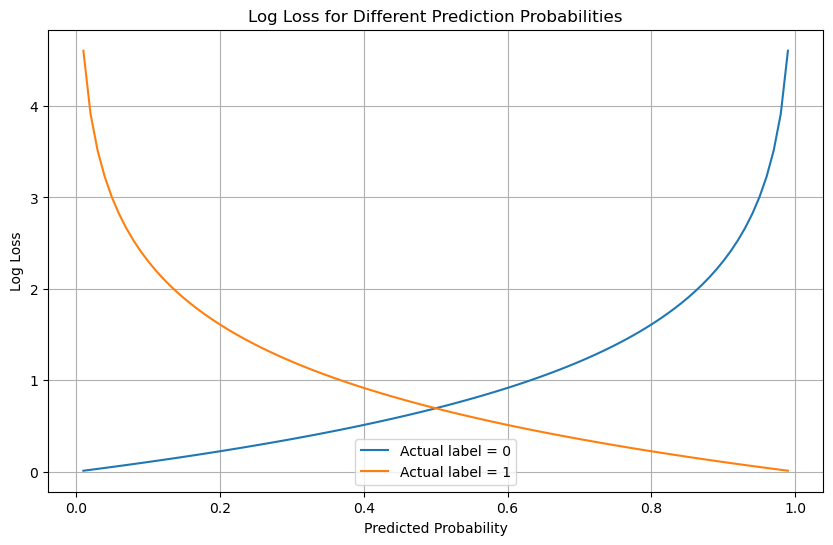

#### 3.4.1 What is a Cost Function?

A cost function helps us measure how well our model's predictions match up with the actual outcomes. In simpler terms, it's like a scoring system that tells us how far off our predictions are from reality. In logistic regression, a commonly used cost function is "Log Loss."

#### 3.4.2 The Math of Log Loss

Log Loss is specially designed for problems where the outcome can be one of two possible classes (like yes/no or 1/0). Here's the equation for Log Loss for one data point:

$$
\text{Log Loss} = - [y \ln(p) + (1-y) \ln(1-p)]
$$

In this equation:
- $ y $ is the actual outcome (1 if the positive class, 0 otherwise)
- $ p $ is the predicted probability of the data point belonging to the positive class

#### 3.4.3 Why Log Loss?

Log Loss is particularly useful because it takes into account the uncertainty of your prediction. We use a logarithm because the logarithm intensifies the penalties for being wrong. If the model predicts a high probability for an actual positive class (or vice versa), the Log Loss value goes down. If the model is wrong, the value goes up by a lot. In other words, the cost is high for a wrong prediction that was made with high confidence, and it's low if the prediction was wrong but made with low confidence. This makes our model strive for more accurate probabilities.

#### 3.4.4  Log Loss for Multiple Data Points

Usually, we have more than one data point. So, we take the average Log Loss over all data points to get a single number that tells us how well our model is doing:

$$
\text{Average Log Loss} = -\frac{1}{N} \sum_{i=1}^{N} [y_i \ln(p_i) + (1-y_i) \ln(1-p_i)]
$$

Here, $ N $ is the total number of data points.

### 3.5 Finding Parameters

#### 3.5.1 The Objective

In logistic regression, the main objective is to find the best-fitting model to describe the relationship between the dependent binary outcome and one or more independent variables. In other words, we want to find the best equation that can predict whether something will happen or not based on other pieces of information. The "best-fitting model" is the familiar equation $ \mathbf{z} = \mathbf{wX} + b $. The parameters we are looking to find are the coefficients $ \mathbf{w} $, weights, and the intercept $ b $, bias. This equation predicts the 'log-odds', which is then transformed into a probability.

#### 3.5.2 Maximum Likelihood Estimation

The most common method used to estimate the parameters is Maximum Likelihood Estimation (MLE). The goal is to find the parameter values, $\mathbf{w}$ and $b$, that maximize the likelihood of the observed data given the model. In simple terms, this method helps us find the numbers for our equation that make our predictions most likely to be true based on the data we have.

##### 3.5.2.1 Mathematical Details

The likelihood, represented as $ L $, gives us the probability of observing the actual outcomes $ Y $ given the parameters $ \mathbf{w} $ and $ b $:

$$
L(\mathbf{w}, b) = P(Y | \mathbf{w}, b)
$$

When we talk about the likelihood function $ L $, we're really asking a simple question: "How well does our model explain the data we see?" To delve further, consider that $ y_i $ is either 0 or 1. This binary nature allows us to use $ y_i $ as a switch between $ p_i $ and $ 1-p_i $ in our likelihood function:

$$
L(\textbf{w}, b) = \prod_{i=1}^{N} [p_i^{y_i} \times (1-p_i)^{(1-y_i)}]
$$

Here, $p_i$ is the predicted probability for the $i^\text{th}$ data point and $y_i$ is the actual label. The symbol $ \prod $ simply means we multiply these terms for all data points in our dataset.

In this likelihood equation you have two parts: $ p_i^{y_i} $ and $ (1-p_i)^{(1-y_i)} $.

Now, recall that $ y_i $ can only be 0 or 1 because we're only picking between two categories, 'yes'/'no' or 'positive'/'negative' for example. Think of $ y_i $ like a light switch:

- When $ y_i = 1 $ (the switch is on), $ p_i^{y_i} $ becomes just $ p_i $, and $ (1-p_i)^{(1-y_i)} $ simplifies to 1.
- When $ y_i = 0 $ (the switch is off), $ p_i^{y_i} $ turns into 1, and $ (1-p_i)^{(1-y_i)} $ is $ 1-p_i $.

So, what's happening is that the equation uses the 'light switch' $ y_i $ to pick the probability term that matches the true outcome for each data point. If the true outcome is 1, it uses $ p_i $; if the true outcome is 0, it uses $ 1-p_i $.

By doing this, the equation is trying to find the model parameters ($ \textbf{w} $ and $ b $) that make these picked probabilities as high as possible, which in turn would make our model's predictions most likely correct.

Now, why do we multiply all these terms together, as given by the symbol $\prod$? In probabilities, when we want to find the chance of multiple independent events happening together, we multiply their individual probabilities. In this case, the "events" are the model accurately predicting each data point.

So, by multiplying all these probabilities, you're calculating the overall likelihood that your model parameters $ \textbf{w} $ and $ b $ are correct given the observed data. The higher this product, the better your parameters fit the data, making them "most probable."

##### 3.5.2.2 Simplifying with Log-Likelihood

Multiplying many probabilities can be computationally challenging, especially when we're dealing with a large number of data points. So, what do we do? We take the natural log of the likelihood function. This turns our product into a sum, making it easier to work with. The log-likelihood function is:

$$
\ln(L(\textbf{w}, b)) = \sum_{i=1}^{N} [y_i \ln(p_i) + (1-y_i) \ln(1-p_i)]
$$

#### 3.5.3 Connection to Log Loss

Minimizing Log Loss and maximizing log-likelihood are two sides of the same coin. They both aim to find the most probable parameters. Log Loss is essentially the negative of the log-likelihood.

This equation might look familiar. It's actually the negative of our [Log Loss function](#342-the-math-of-log-loss), it's the same equation multiplied by -1:

- Log Loss for one data point:
$$
\text{Log Loss} = - [y \ln(p) + (1-y) \ln(1-p)]
$$

So when we maximize the log-likelihood, we're doing the same thing as minimizing the Log Loss. Both actions aim to find the model parameters that make the observed data most probable.

By understanding the likelihood and log-likelihood, you get a fuller picture of what logistic regression is doing. It's all about finding the model parameters that make the data you've observed as probable as possible.

### 3.6 Gradient Descent

As with linear regression, the aim of gradient descent in logistic regression is to find the parameters that minimize the cost function. However, in logistic regression, the cost function isn't directly used, instead we use a logarithmic function, the log-loss.

#### 3.6.1 Mathematical Foundations

To apply gradient descent to logistic regression, let's first recall some key concepts:

1. **Log-Likelihood**: The objective of logistic regression is to maximize the log-likelihood function. This function measures how well our model explains the observed data. Mathematically, it is expressed as:

$$
\ln(L(\textbf{w}, b)) = \sum_{i=1}^{N} [y_i \ln(p_i) + (1-y_i) \ln(1-p_i)]
$$

Here, $y_i$ is the actual label (0 or 1), and $p_i$ is the predicted probability of being 1 for the $i$-th sample.

2. **Log Loss**: Minimizing the negative of the log-likelihood function (or log loss) is the same as maximizing the log-likelihood function. The log loss for a single sample is:

$$
\text{Log Loss} = - [y \ln(p) + (1-y) \ln(1-p)]
$$

The loss function we want to minimize in gradient descent is actually the average log loss, which is given by:

$$
\text{Average Log Loss} = -\frac{1}{N} \sum_{i=1}^{N} [y_i \ln(p_i) + (1-y_i) \ln(1-p_i)]
$$

Here $N$ is the number of data samples, $y_i$ is the true label of the $i^\text{th}$ sample, and $p_i$ is the predicted probability of the $i^\text{th}$ sample being in class $1$.

3. **Sigmoid Function**: We use the sigmoid function to map any real-valued number into the range of [0, 1], which we use as the predicted probability $p$.

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

4. **Log-Odds**: The log-odds is simply the input of the sigmoid function, and it's the linear combination of weights and features.

$$
\mathbf{z} = \mathbf{wX} + b
$$

#### 3.6.2 Gradient Descent Equations

The gradient descent algorithm adjusts the parameters $ \textbf{w} $ and $ b $ iteratively to minimize the log loss. The update equations for $ \textbf{w} $ and $ b $ in logistic regression are:

$$
\textbf{w} := \textbf{w} - \alpha \frac{\partial}{\partial \textbf{w}} \left( -\ln(L(\textbf{w}, b)) \right)
$$
$$
b := b - \alpha \frac{\partial}{\partial b} \left( -\ln(L(\textbf{w}, b)) \right)
$$

Here, $ \alpha $ is the learning rate, which controls how big the steps are in the gradient descent algorithm.

Computing these partial derivatives of the loss function with respect to $w$ and $b$ respectively, we get:

$$
dw = \frac{1}{m} \sum_{i=1}^{m} (p_i - y_i) x_i
$$
$$
db = \frac{1}{m} \sum_{i=1}^{m} (p_i - y_i)
$$

#### 3.6.3 Detailed Example

Let's go step-by-step through an example. Assume we have 3 students, and we know the number of hours they studied and whether they passed (1) or failed (0) an exam.

- Student 1: $ X_1 = 2 $ hours, $ y_1 = 0 $ (failed)
- Student 2: $ X_2 = 4 $ hours, $ y_2 = 1 $ (passed)
- Student 3: $ X_3 = 5 $ hours, $ y_3 = 1 $ (passed)

**Step 1: Initialize Parameters**

Let's start with initial guesses. $ w = 0.5 $ and $ b = 0 $.

In [26]:
import numpy as np

# Initialize parameters
w = 0.5
b = 0
alpha = 0.1
iterations = 1000

# Data
X = np.array([2, 4, 5])  # Hours studied
y = np.array([0, 1, 1])  # Passed (1) or Failed (0)

**Step 2: Calculate Predicted Probabilities**

For each student, we calculate the log-odds $ z $ using $ z = wX + b $, and then find $ p = \sigma(z) $.

- For Student 1: $ z_1 = 0.5 \times 2 + 0 = 1 $, $ p_1 = \sigma(1) $
- For Student 2: $ z_2 = 0.5 \times 4 + 0 = 2 $, $ p_2 = \sigma(2) $
- For Student 3: $ z_3 = 0.5 \times 5 + 0 = 2.5 $, $ p_3 = \sigma(2.5) $

In [27]:
def logOdds(X, w, b):
    return np.dot(X, w) + b

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = logOdds(X, w, b)
p = sigmoid(z)
print(f"z1 = {z[0]}; p1 = sigmoid({z[0]}) = {p[0]}")
print(f"z2 = {z[1]}; p2 = sigmoid({z[1]}) = {p[1]}")
print(f"z3 = {z[2]}; p3 = sigmoid({z[2]}) = {p[2]}")


z1 = 1.0; p1 = sigmoid(1.0) = 0.7310585786300049
z2 = 2.0; p2 = sigmoid(2.0) = 0.8807970779778823
z3 = 2.5; p3 = sigmoid(2.5) = 0.9241418199787566


**Step 3: Compute Log-Loss**

We can now compute the log-loss for each student using the formula $ - [y \ln(p) + (1-y) \ln(1-p)] $, and then sum these to get the overall log-loss.


In [28]:
def logLoss(y, p):
    N = len(y) # Number of samples
    return (-np.sum(np.dot(y, np.log(p)) + np.dot((1 - y), np.log(1 - p))))/N

loss = logLoss(y, p)
print(f"Loss = {loss}")

Loss = 0.5063598109512483


**Step 4: Update Parameters**

We then calculate the gradient of the log loss with respect to $ w $ and $ b $ and update them using the gradient descent equations above.

By repeating Steps 2-4, we iteratively refine our estimates for $ w $ and $ b $ until they converge to values that minimize the log loss, thus providing us with the most optimal logistic regression model for the given data.

optimal w = 2.0060647240793292, optimal b = -5.571083763896473


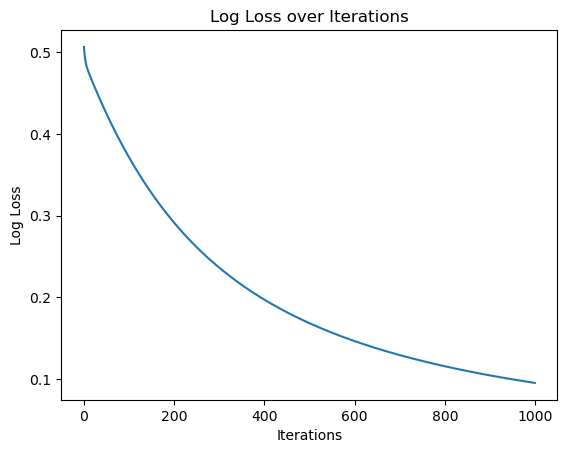

In [29]:
def gradientDescent(X, y, initial_w, initial_b, alpha, iterations):
    # To store log loss for each iteration
    log_loss_list = []
    N = len(y) # Number of samples
    w, b = initial_w, initial_b
    for i in range(iterations):
        # Calculate predicted probabilities
        z = logOdds(X, w, b)
        p = sigmoid(z)
        # Compute log loss
        log_loss = logLoss(y, p)
        log_loss_list.append(log_loss)
         # Compute gradients correctly
        dw = np.dot((p - y), X) / N
        db = np.sum(p - y) / N
        # Update parameters
        w = w - alpha * dw
        b = b - alpha * db
    return w, b, log_loss_list

w, b, log_loss_list = gradientDescent(X, y, w, b, alpha, iterations)
# print the result of gradient descent
print(f"optimal w = {w}, optimal b = {b}")

# Plot log loss
plt.plot(log_loss_list)
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.title('Log Loss over Iterations')
plt.show()


#### 3.6.4 Using Optimal $w$ and $b$ for Predictions

Now that we've obtained the optimal $w$ and $b$ values, we can use them to make predictions.

To make a prediction on new data we:
1. Compute the log-odds ($z$) for the new data point using $z=\mathbf{wX} + b$. The new data point is the number of hours a new student has studied.
2. Pass this $z$ through the sigmoid function to get the predicted probability ($p$). This is the probability that this new student who studied $x$ amount of hours will pass the exam.
3. Classify the data point by applying a threshold to $p$, typically $0.5$ if $p >= 0.5$ the predicted label is $1$, otherwise it's $0$.

Now let's continue our example and make a preddiction on a new data point:
- Student 4: $ X_3 = 3 $ hours, $ y_4 = ? $ (unknown)

Let's try and find $y_4$.

**Step 1**

Compute the log-odds:

In [30]:
# Assume optimal w and b have been found in the previous gradient descent example
w_optimal, b_optimal = w, b

# New data point: Student studied for 3 hours
X_new = 3

# Compute log-odds
z_new = logOdds(X_new, w_optimal, b_optimal)

**Step 2**

Now that we have the log odds for the new data point, let's use the sigmoid function to get the probability that the new student will pass the exam:

In [31]:

# Compute predicted probability
p_new = sigmoid(z_new)
print(f"p_new = sigmoid({z_new}) = {p_new}")

p_new = sigmoid(0.4471104083415147) = 0.6099519884062089


**Step 3**

Now that we have the probability, we need to classify it. We use a threshold of $0.5$, if the student's probability of passing the exam is greater than $0.5$, then we classify this new data point as passing and assign it a lable $1$, Otherwise we classify this as failing, and assign it a lable $0$:

In [32]:
def labelToText(label):
    return "Passed" if label == 1 else "Failed"
# Classify
predicted_label = 1 if p_new >= 0.5 else 0
print(f"The predicted label for a student who studied {X_new} hours is {predicted_label} ({labelToText(predicted_label)}).")

The predicted label for a student who studied 3 hours is 1 (Passed).


### 3.7 Decision Boundary

After obtaining the optimal parameters $w$ and $b$ through gradient descent, you can use these parameters to make predictions. But how do you decide if a new data point should be classified as 0 or 1? This is where the concept of the "decision boundary" comes into play.

#### 3.7.1 The Mathematics of the Decision Boundary

The decision boundary is a geometric concept, hyperplane that separates the input feature space into regions that correspond to different classes. It essentially serves to group the various data points into classes. In logistic regression, the decision boundary is derived from the equation:

$$
P(y=1 | x) = \frac{1}{1 + e^{-(w_1 x_1 + w_2 x_2 + \ldots + w_p x_p + b)}}
$$

If we take the threshold for classification to be 0.5, the decision boundary can be found by setting $ P(y=1 | x) $ to 0.5, which simplifies to:

$$
w_1 x_1 + w_2 x_2 + \ldots + w_p x_p + b = 0
$$

or in a more familiar notation:
$$
\mathbf{wX} + b = 0
$$

This is the equation for the decision boundary. In logistic regression with only two features, this decision boundary is simply a line defined by $w_1 x_1 + w_2 x_2 + b = 0 $. Any point falling on one side of this line is predicted to belong to one class, and any point on the other side to the other class.

#### 3.7.2 Decision Rules

So how do you use this decision boundary for making predictions? It depends on the threshold we specify. Since we set the threshold to $0.5$, This means that anything below this threshold is one class, and anything above it is another class. In other words:

1. **Above the Boundary**: If $\mathbf{wX} + b = 0 > 0 $, then $ P(y=1 | x) > 0.5 $, and the prediction is class 1.
   
2. **Below the Boundary**: If $ \mathbf{wX} + b = 0 < 0 $, then $ P(y=1 | x) < 0.5 $, and the prediction is class 0.

3. **On the Boundary**: If $ \mathbf{wX} + b = 0 = 0 $, then $ P(y=1 | x) = 0.5 $, and you could say the model is undecided between the two classes. However, this situation is relatively rare in practice.

The decision boundary is an essential concept because it allows us to visualize how a logistic regression model separates classes. The geometric insights can be particularly useful for understanding misclassifications and how your model is performing on the data.

#### 3.7.3 Example with Code

Let's use a practical example to visualize all of these concepts. Consider we have a dataset containing two features $x_1$ and $x_2$ that are to be used to predict a binary outcome $y$.

First, we'll generate some synthetic data and plot it:


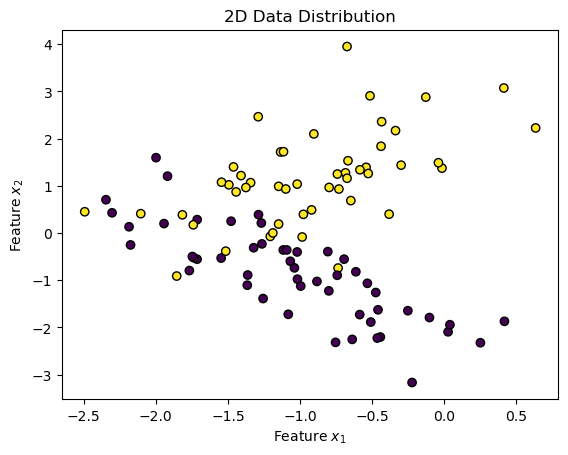

In [33]:
from sklearn.datasets import make_classification

# Generate synthetic data
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, n_classes=2)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, edgecolor='k')

plt.xlabel('Feature $x_1$')
plt.ylabel('Feature $x_2$')
plt.title('2D Data Distribution')
plt.show()

Now, let's run logistic regression to obtain $\mathbf{w}$, which would give use $w_1$ and $w_2$. We can do this by using the gradient descent function we defined earlier:


In [34]:
initial_w = np.array([0.5, 0.5])
initial_b = 0
w, b, log_loss_list = gradientDescent(X, y, initial_w, initial_b, alpha, iterations)
print(f"optimal w = {w}, optimal b = {b}")
print(f"w1 = {w[0]}, w2 = {w[1]}")


optimal w = [0.8692989  2.22830048], optimal b = 0.8069790961367254
w1 = 0.8692989043002868, w2 = 2.2283004793979457


Once we know $w_1$, $w_2$, and $b$, we can use those values to plot the decision boundary.

Recall that the equation of the decision boundary is
$$
\mathbf{wX} + b = 0
$$

or 

$$
w_1x_1 + w_2x_2 + b = 0
$$

solving for one feature in terms of another, $x_2$ in this case, we get:
$$
x_2 = \frac{-(w_1x_1 + b)}{w_2}
$$

We can now use this to plot the decision boundary:


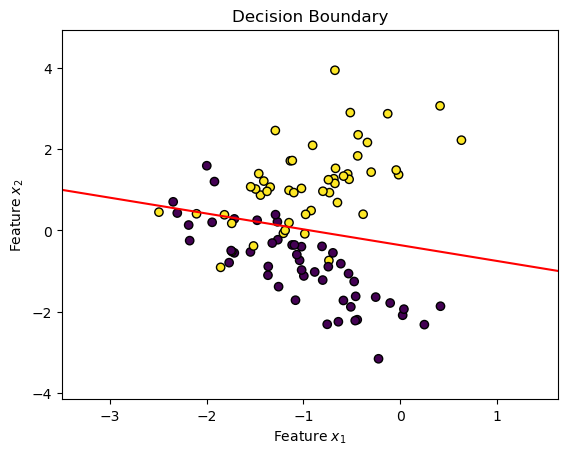

In [35]:
# Define the decision boundary
def decisionBoundary(x, w, b):
    return -(b + w[0] * x) / w[1]

# Plot Decision Boundary
x_min = X[:, 0].min() - 1
x_max = X[:, 0].max() + 1
y_min = X[:, 1].min() - 1
y_max = X[:, 1].max() + 1
x_values = np.linspace(x_min, x_max, 400)
y_values = decisionBoundary(x_values, w, b)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, edgecolor='k')
plt.plot(x_values, y_values, 'r')
plt.xlabel('Feature $x_1$')
plt.ylabel('Feature $x_2$')
plt.title('Decision Boundary')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()


There you have it—a comprehensive breakdown of the decision boundary in logistic regression. The red line in the plot represents the decision boundary, and you can see how it separates the two classes. The points above the line are predicted as class 1, and those below as class 0.


### 3.8 Evaluating Fit

After your gradient descent algorithm has converged and you've found your "optimal" parameters $ \mathbf{w} $ and $ b $, the next step is to see how well your model fits the data. You've been minimizing a loss function (log loss in logistic regression) to find these parameters, but how do you know if the model is any good?

#### 3.8.1 Statistical Measures for Model Evaluation

##### 3.8.1.1 Likelihood Ratio Test

This test compares the fit of your model to a null model, which is a model with no predictors, just an intercept. Essentially, you're asking: "Is my model better than a model that predicts nothing useful?" 

##### 3.8.1.2 Akaike Information Criterion (AIC)

AIC estimates the relative amount of information lost by a given model. It punishes complex models: the lower the AIC, the better the model. You would usually compare AIC values across multiple models; the one with the lowest AIC is often considered the best among the considered models.

##### 3.8.1.3 Bayesian Information Criterion (BIC)

Similar to AIC, but BIC adds a heavier penalty for models with more parameters, making it stricter regarding complexity.

#### 3.8.2 Relevance to Logistic Regression and Gradient Descent

In logistic regression, you're optimizing the log loss via gradient descent to find the best $ \mathbf{w} $ and $ b $. But once you have them, it doesn't automatically mean your model is good or bad. Using statistical criteria like the likelihood ratio test, AIC, and BIC allows you to more formally evaluate the quality of your model.

For example, if your model's AIC is significantly lower than that of other models, you can be more confident that you've chosen a good set of features and that your gradient descent didn't just minimize loss—it found a model that is likely to generalize well to unseen data.

#### 3.8.3 When Do You Do This?

You would typically evaluate these criteria after you've trained your model and before you deploy it to make predictions on new, unseen data. 

#### 3.8.4 Example

Let's consider a simplified scenario. Assume you've used logistic regression to predict whether an email is spam or not. You have two models:

1. Model A uses the features: email length and frequency of the word "offer".
2. Model B uses the features: email length, frequency of the word "offer", and number of attachments.

You run both models, use gradient descent to find the optimal parameters, and then calculate AIC for both:

- AIC for Model A: 120
- AIC for Model B: 125

Even though Model B uses more features, its AIC is higher, indicating that it might not be better than Model A in explaining the variability in the data. Hence, you might prefer Model A for its simplicity and better AIC value.

By doing so, you're not just blindly following the path of gradient descent. You're making an informed decision, and that's what makes your model robust and reliable.

## 4 Advanced Concepts

### 4.1 Regularization Techniques

Regularization in logistic regression works much like it does in linear regression (discussed in [Linear Regression - Deeper Dive section 2.6.3](../linear-regression/Linear%20Regression%20-%20Deeper%20Dive.ipynb)). It modifies the original log-loss function by adding a penalty term. This penalty constrains the magnitudes of the parameter vectors and prevents the model from fitting high-frequency noise, thus reducing overfitting.

The primary regularization techniques used in logistic regression are L1 regularization (Lasso) and L2 regularization (Ridge).

#### 4.1.1 Ridge Regularization (L2 Regularization)

In Ridge regularization, the penalty term is added to the original log-loss function as follows:

$$
J(w, b) = - \frac{1}{n} \sum_{i=1}^{n} [y_i \ln(p_i) + (1-y_i) \ln(1-p_i)] + \alpha \sum_{j=1}^{p} w_j^2
$$

The components are:
- The first part is the original log loss, which measures the model's goodness of fit.
- The second term, $ \alpha \sum_{j=1}^{p} w_j^2 $, adds a penalty based on the square of the coefficients.
- $ \alpha $ controls the strength of the regularization.

To implement Ridge regularization in scikit-learn, you would use:

In [36]:
from sklearn.linear_model import LogisticRegression
# max_iter is only used to allow the model to converge
ridge_model = LogisticRegression(penalty='l2', C=0.1, max_iter=1000)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

The hyperparameters used here are:
1. **`C`:** Inverse of regularization strength ($ \alpha $). Smaller values specify stronger regularization. $ C = \frac{1}{\alpha} $. Since $ C = 0.1 $, $ \alpha = 10 $.
2. **`penalty`:** Specifies the regularization ('l1', 'l2'). We specified `'l2'`, Ridge Regularization 
3. **`max_iter`:** Maximum number of iterations for the solver to converge.

#### 4.1.2 Lasso Regularization (L1 Regularization)

Lasso adds an absolute-value-based penalty term to the log-loss function:

$$
J(w, b) = - \frac{1}{n} \sum_{i=1}^{n} [y_i \ln(p_i) + (1-y_i) \ln(1-p_i)] + \alpha \sum_{j=1}^{p} | w_j |
$$

The key difference:
- Lasso uses the absolute values of the coefficients as a penalty, encouraging some coefficients to become zero and thus acting as a form of feature selection.

Here is how you would implement Lasso regularization:


In [37]:
from sklearn.linear_model import LogisticRegression
lasso_model = LogisticRegression(penalty='l1', C=0.1, solver='saga', max_iter=1000)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)

/Users/santiagogomez/anaconda3/envs/ml-learning/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In this example, the hyperparameters used are:
1. **`C`:** Inverse of regularization strength ($ \alpha $). Smaller values specify stronger regularization. $ C = \frac{1}{\alpha} $. Since $ C = 0.1 $, $ \alpha = 10 $.
2. **`penalty`:** Specifies the regularization ('l1', 'l2'). We specified `'l1'`, Lasso Regularization
3. **`solver`:** We specify `saga` as this solver allows for `l1` regularization, the default `lbfgs` solver does not.
4. **`max_iter`:** Maximum number of iterations for the solver to converge.

#### 4.1.3 Summary

Both Ridge and Lasso in logistic regression serve the same core purpose as in linear regression: to prevent overfitting by adding complexity to the cost function. The choice between Ridge and Lasso or a combination of both (Elastic Net) depends on your specific needs—whether you require feature selection or just a simpler, more generalizable model.

### 4.2 Multiclass Classification

In the realm of machine learning, there are often situations where we have more than two classes to predict. This type of classification problem is known as "Multiclass Classification". Unlike binary classification, which deals with two classes (e.g., "yes" or "no"), multiclass classification deals with three or more classes.

In multiclass classification, the goal is to assign each input sample $ \mathbf{x} $ to one of $ K $ classes $ C_1, C_2, \ldots, C_K $, where $ K > 2 $. 

The most popular algorithms for multiclass classification include:
- **One-vs-All (OvA) or One-vs-Rest (OvR)**
- **One-vs-One (OvO)**
- **Softmax Regression**

#### 4.2.1 One-vs-All (OvA) and One-vs-One (OvO)

1. **One-vs-All (OvA) or One-vs-Rest (OvR)**: For $K$ classes, $K$ different binary classifiers, or models, are trained, one for each class. Each model is trained to separate one class from all the other classes.
  
2. **One-vs-One (OvO)**: Train a separate binary classifier, or model, for every pair of classes. For $K$ classes, you would end up training $ \frac{K \times (K-1)}{2} $ binary classifiers. Each model distinguishes between every pair of classes.

Between the two, OvA is generally preferred due to its scalability.

#### 4.2.2 Softmax Regression 

Softmax regression, or multinomial logistic regression, is a direct generalization of logistic regression for multi-class problems. Instead of one logistic regression model, you have $K$ models. Instead of using the sigmoid function, it uses the softmax function to squeeze the outputs for each class between 0 and 1 and also ensure that they sum up to 1. Given an input $ \mathbf{x} $, Softmax Regression computes the scores $ z_k $ for each class $ k $ using a similar linear equation we used for logistic regression:

$$
z_k = \mathbf{w}_k \cdot \mathbf{x} + b_k
$$

Here, $ \mathbf{w}_k $ and $ b_k $ are the weight vector and bias term for class $ k $.

**Softmax Function**

The Softmax function then converts these raw scores $z_k$, called logits, and converts them into probabilities. The equation for the Softmax function is:

$$
p_k = \frac{{e^{z_k}}}{{\sum_{j=1}^{K} e^{z_j}}}
$$

Where $ z_k = \mathbf{w}_k \cdot \mathbf{x} + b_k $ is the raw score (logit) for class $ k $.

The class with the highest probability is chosen as the output class:

$$
\hat{y} = \arg\max_k p_k
$$

Here, $\hat{y}$ is the predicted label for the input $\mathbf{x}$. It's the class that has the highest estimated probability. The $\arg\max$ function returns the argument, in this case, the class $k$, that gives the maximum value of $p_k$.

In Binary classification as we've seen before, $\hat{y}$ is 1 if $p >= 0.5$ and $0$ otherwise. In multiclass, $\hat{y}$ is the class that maximizes $p_k$ since we have more than just the labels 0 and 1.

##### 4.2.2.1 Cost Function & Gradient Descent

The cost function for Softmax Regression is called the "Cross-Entropy Loss", which generalizes the log loss we used for binary logistic regression. It is defined as:

$$
J(\mathbf{W}, \mathbf{b}) = - \frac{1}{m} \sum_{i=1}^{m} \sum_{k=1}^{K} y_{i,k} \log(p_{i,k})
$$

Where $ y_{i,k} $ is 1 if the true label is $k$ and 0 otherwise. $ p_{i,k} $ is the predicted probability for class $k$ for the $i^\text{th}$ example.

For gradient descent, the gradient of this cost function with respect to each weight $ \mathbf{w}_k $ and bias $ b_k $ needs to be computed and updated iteratively. This is similar to what we do in binary logistic regression but extended to handle multiple classes.

##### 4.2.2.2 Evaluating Fit

Just as in logistic regression, evaluation metrics like accuracy, precision, and recall can be used. For comparing different models or parameter sets, metrics like AIC and BIC can also be employed.

##### 4.2.2.3 Softmax Example: Classifying Fruits

**Given**:

- Classes: 'Apple' (0), 'Banana' (1), 'Cherry' (2)
- Features: Weight and color code
- A new fruit with features $ \mathbf{x} = [1.1, 3] $

**Step 1: Obtain Raw Scores (Logits)**

After training your Softmax Regression model, you'll have a set of weights $ \mathbf{W} $ and biases $ b $ for each class. These are used to calculate the raw scores or logits $ z $.

Let's make up some logits for the example:
- $ z_0 = 1.5 $ (Logit for 'Apple')
- $ z_1 = 0.9 $ (Logit for 'Banana')
- $ z_2 = 0.3 $ (Logit for 'Cherry')

**Step 2: Calculate Probabilities using Softmax**

The Softmax function transforms these logits into probabilities $ p $. The formula is:

$$
p_k = \frac{e^{z_k}}{\sum_{j=1}^{K} e^{z_j}}
$$

Using this formula, we calculate the probabilities:

- $ p_0 = \frac{e^{1.5}}{e^{1.5} + e^{0.9} + e^{0.3}} $
- $ p_1 = \frac{e^{0.9}}{e^{1.5} + e^{0.9} + e^{0.3}} $
- $ p_2 = \frac{e^{0.3}}{e^{1.5} + e^{0.9} + e^{0.3}} $

Assume after calculation:
- $ p_0 = 0.6 $
- $ p_1 = 0.3 $
- $ p_2 = 0.1 $

**Step 3: Make a Prediction**

Finally, we pick the class with the highest probability as the predicted class. In mathematical terms, we use $ \arg\max_k p_k $.

- $ \hat{y} = \arg\max_k (0.6, 0.3, 0.1) $ 
- $ \hat{y} = 0 $

Therefore, the model would classify the new fruit as an 'Apple' because $ p_0 $ is the highest probability (0.6).

The Softmax function ensures that all probabilities sum to 1, giving a coherent probabilistic interpretation. It also provides a measure of confidence; here the model is 60% confident that the fruit is an 'Apple'.

#### 4.2.3 Multi-class Classification: The Application

##### 4.2.3.1 Data Preprocessing

Like in binary classification, you'll begin by preprocessing your data. This often includes scaling features, dealing with missing values, and encoding categorical variables.

##### 4.2.3.2 Model Training

1. **OvA or OvO**: If using OvA or OvO, train multiple binary logistic regression models. For prediction, choose the class with the highest probability from among the individual classifiers.

2. **Softmax Regression**: Fit the softmax model to your data. Here, you'll find the $ m $ values for each class that maximize the likelihood of the observed data.

##### 4.2.3.3 Model Evaluation

1. **Confusion Matrix**: You can extend the concept of a confusion matrix to multiple classes to evaluate your model's performance.

2. **Other Metrics**: Precision, recall, and F1-score can also be generalized for multi-class classification problems.

##### 4.2.3.4 Use-Cases

1. **Natural Language Processing**: Classifying text into various topics or sentiment categories.
  
2. **Image Recognition**: Classifying images into multiple categories like animals, objects, etc.

3. **Medical Diagnosis**: Predicting the type of diseases based on symptoms.

## 5 Conclusion

As we've journeyed through the world of logistic regression, we've managed to accomplish a lot. Starting with the basics, we explored how logistic regression is used for classification problems, differentiating it from its linear counterpart. We delved into sentiment analysis, applying our understanding of logistic regression to build a model capable of assessing movie reviews. We also took a detour into the theory behind logistic regression, understanding the mathematics that power the algorithm—from log odds and the sigmoid function to the process of gradient descent.

Our work on the sentiment analysis model demonstrates the practical utility of logistic regression. The model, albeit simple, opens the door to a wider range of natural language processing applications. Understanding the theory was not merely an academic exercise; it provided us with the tools to understand model fit and evaluation, refining our approach to developing robust models.

### 5.1 Next Steps

1. **Advanced Algorithms**: Dive deeper into using more advanced algorithms like Support Vector Machines, KNN, Decision Trees and Random Forests, or Neural Networks.
2. **Unsupervised Learning**: Learn about unsupervised learning algorithms like K-Means Clustering and Anomoly Detection.